In [ ]:
import numpy as np
import pandas as pd
import random

np.random.seed(42)
random.seed(42)


In [ ]:
# =========================
# 1. Setup & reproducibility
# =========================
import numpy as np
import pandas as pd
import random

np.random.seed(42)
random.seed(42)

print("Environment ready")



Environment ready


In [ ]:
# =========================
# 2. Load data
# =========================
from google.colab import files

uploaded = files.upload()  # upload PPP_QCA_FINAL_FUZZY.csv


Saving PPP_QCA_FINAL_FUZZY.csv.xlsx to PPP_QCA_FINAL_FUZZY.csv.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("PPP_QCA_FINAL_FUZZY.csv.xlsx")
print("Shape:", df.shape)
df.head()

Shape: (237, 27)


,Y,f_Renegotiation,f_RevenueModel_type,f_VoiceOfAccountability_StakeholderEngagement,f_Macro_Enviromentimpact,f_Regulority_Qualityassess,f_ControlofCorruption,f_BiddingTeam,f_PPP_Procurement,f_Financial_capacity,...,f_Cost_efficiency,f_Environmental_Impact,f_Insitutional_contrcta_Enforecement,f_StakeholderSatisfaction,f_Outcome_specification,f_Service_Quality,f_Time,f_Cost,f_Quality,f_Smart_Innovation
0,0.5,1.0,0.5,9.812170e-01,0.016396,0.959145,0.991811,0.500000,0.5,0.5,...,0.050000,0.813395,0.989706,0.186605,0.186605,0.5,0.0,0.50,0.0,0.5
1,0.5,0.5,0.5,9.675880e-01,0.012033,0.950000,0.993583,0.500000,0.5,0.5,...,0.186605,0.813395,0.989706,0.186605,0.186605,0.5,0.0,0.50,0.5,0.5
2,0.5,0.5,0.5,9.811618e-01,0.016439,0.949790,0.989502,0.813395,0.5,0.5,...,0.186605,0.813395,0.951059,0.186605,0.186605,0.5,0.5,0.95,0.5,0.5
3,0.5,0.5,0.5,6.106955e-12,0.016439,0.949790,0.989502,0.813395,0.5,0.5,...,0.186605,0.813395,0.946121,0.186605,0.186605,0.5,0.5,0.95,0.5,0.5
4,0.5,0.5,0.5,9.713061e-01,0.014490,0.958972,0.994973,0.813395,0.5,0.5,...,0.186605,0.813395,0.986480,0.186605,0.186605,0.5,0.5,0.95,0.5,0.5


In [ ]:
# =========================
# 3. Define outcome & predictors
# =========================

# Prefer strict success definition if available
if "Y_strict" in df.columns:
    target_col = "Y_strict"
else:
    target_col = "Y"

print("Target variable:", target_col)
print(df[target_col].value_counts())

# Predictor variables: all fuzzy conditions
feature_cols = [c for c in df.columns if c.startswith("f_")]

print("Number of predictors:", len(feature_cols))
print(feature_cols)


Target variable: Y
Y
0.5    174
0.0     63
Name: count, dtype: int64
Number of predictors: 26
['f_Renegotiation', 'f_RevenueModel_type', 'f_VoiceOfAccountability_StakeholderEngagement', 'f_Macro_Enviromentimpact', 'f_Regulority_Qualityassess', 'f_ControlofCorruption', 'f_BiddingTeam', 'f_PPP_Procurement', 'f_Financial_capacity', 'f_Project_Financing', 'f_Financial_Viability', 'f_Partnership_collabration', 'f_Lifecycle_cost', 'f_Political_Risk', 'f_Sustainability', 'f_Risk_allocation', 'f_Cost_efficiency', 'f_Environmental_Impact', 'f_Insitutional_contrcta_Enforecement', 'f_StakeholderSatisfaction', 'f_Outcome_specification', 'f_Service_Quality', 'f_Time', 'f_Cost', 'f_Quality', 'f_Smart_Innovation']


In [ ]:
# =========================
# 3A. Create strict success outcome for prediction
# =========================

# Inspect Y distribution
df["Y"].describe()


,Y
count,237.000000
mean,0.367089
std,0.221353
min,0.000000
25%,0.000000
50%,0.500000
75%,0.500000
max,0.500000


In [ ]:
# =========================
# 3C. Final strict success definition
# =========================

df["Y_strict"] = (df["Y"] == 0.5).astype(int)

print("Y_strict distribution:")
print(df["Y_strict"].value_counts())


Y_strict distribution:
Y_strict
1    174
0     63
Name: count, dtype: int64


In [ ]:
# =========================
# 3D. Final target & predictors
# =========================

target_col = "Y_strict"
feature_cols = [c for c in df.columns if c.startswith("f_")]

print("Target:", target_col)
print(df[target_col].value_counts())
print("Number of predictors:", len(feature_cols))


Target: Y_strict
Y_strict
1    174
0     63
Name: count, dtype: int64
Number of predictors: 26


In [ ]:
# =========================
# 4. Stratified train/test split
# =========================
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("\nTrain class distribution:")
print(y_train.value_counts())
print("\nTest class distribution:")
print(y_test.value_counts())


Train shape: (177, 26)
Test shape: (60, 26)

Train class distribution:
Y_strict
1    130
0     47
Name: count, dtype: int64

Test class distribution:
Y_strict
1    44
0    16
Name: count, dtype: int64


In [ ]:
# =========================
# 5. Standardisation
# =========================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to test data


In [ ]:
# =========================
# 5. Standardisation (complete)
# =========================
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the SAME scaler
X_test_scaled = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

# Quick sanity check: training data should now have mean ~0 and std ~1
print("\nSanity check (first 5 features):")
print("Train mean:", np.round(X_train_scaled.mean(axis=0)[:5], 3))
print("Train std :", np.round(X_train_scaled.std(axis=0)[:5], 3))


Scaled train shape: (177, 26)
Scaled test shape: (60, 26)

Sanity check (first 5 features):
Train mean: [ 0.  0. -0.  0.  0.]
Train std : [1. 1. 1. 1. 1.]


In [ ]:
# =========================
# 6. Model 1 — Logistic Regression (baseline)
# =========================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Train model
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("LOGISTIC REGRESSION — TEST RESULTS\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("ROC-AUC :", round(roc_auc_score(y_test, y_proba_lr), 3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


LOGISTIC REGRESSION — TEST RESULTS

Accuracy: 0.867
ROC-AUC : 0.891

Confusion Matrix:
[[10  6]
 [ 2 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.88      0.95      0.91        44

    accuracy                           0.87        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.86      0.87      0.86        60



In [ ]:
# =========================
# 7. Model 2 — Random Forest
# =========================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight="balanced"
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("RANDOM FOREST — TEST RESULTS\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("ROC-AUC :", round(roc_auc_score(y_test, y_proba_rf), 3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


RANDOM FOREST — TEST RESULTS

Accuracy: 0.9
ROC-AUC : 0.953

Confusion Matrix:
[[11  5]
 [ 1 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.90      0.98      0.93        44

    accuracy                           0.90        60
   macro avg       0.91      0.83      0.86        60
weighted avg       0.90      0.90      0.90        60



In [ ]:
# =========================
# 8. Model 3 — Gradient Boosting
# =========================
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

# Train
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

# Evaluation
print("GRADIENT BOOSTING — TEST RESULTS\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_gb), 3))
print("ROC-AUC :", round(roc_auc_score(y_test, y_proba_gb), 3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


GRADIENT BOOSTING — TEST RESULTS

Accuracy: 0.883
ROC-AUC : 0.936

Confusion Matrix:
[[11  5]
 [ 2 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.89      0.95      0.92        44

    accuracy                           0.88        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.88      0.88      0.88        60



Please upload 'PPP_QCA_FINAL_FUZZY.csv.xlsx' again to proceed.


Saving PPP_QCA_FINAL_FUZZY.csv.xlsx to PPP_QCA_FINAL_FUZZY.csv.xlsx
Shape: (237, 27)
['Y', 'f_Renegotiation', 'f_RevenueModel_type', 'f_VoiceOfAccountability_StakeholderEngagement', 'f_Macro_Enviromentimpact', 'f_Regulority_Qualityassess', 'f_ControlofCorruption', 'f_BiddingTeam', 'f_PPP_Procurement', 'f_Financial_capacity']
Using target: Y_strict
Y_strict
1    174
0     63
Name: count, dtype: int64
Final X shape: (237, 26)  y distribution: {1: 174, 0: 63}
                       Model  CV ROC-AUC (mean)  CV ROC-AUC (std)  \
1              Random Forest           0.917350          0.039516   
2          Gradient Boosting           0.886752          0.050093   
0  Logistic Regression (std)           0.845983          0.071010   

   Test ROC-AUC  Test Accuracy  
1      0.953125       0.900000  
2      0.936080       0.883333  
0      0.890625       0.866667  


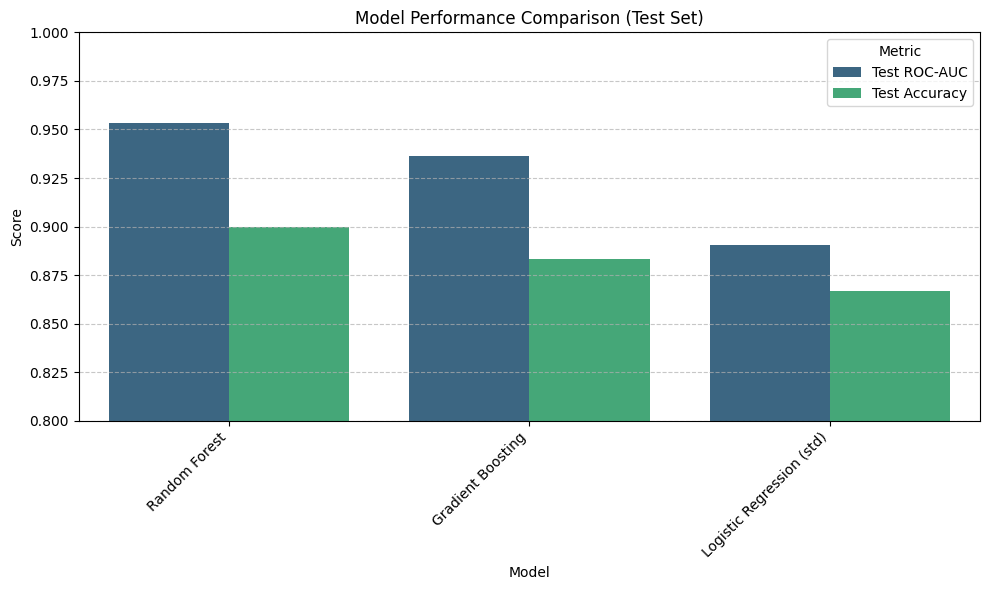

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# -----------------------------
# 1) Load data
# -----------------------------
from google.colab import files

print("Please upload 'PPP_QCA_FINAL_FUZZY.csv.xlsx' again to proceed.")
uploaded = files.upload() # This will prompt the user to upload the file

# OPTION A: If you're using the final fuzzy file:
df = pd.read_excel("PPP_QCA_FINAL_FUZZY.csv.xlsx")

# If you instead want to use your raw file (less recommended for comparison):
# df = pd.read_csv("ZizfonJdatabase.csv", encoding="latin1")

print("Shape:", df.shape)
print(df.columns.tolist()[:10])

# -----------------------------
# 2) Pick outcome (target)
# -----------------------------
# Prefer Y_strict if it exists; otherwise create it from Y
if "Y_strict" in df.columns:
    target_col = "Y_strict"
elif "Y" in df.columns:
    # create a strict success label from fuzzy Y: top 30% = success
    q = df["Y"].quantile(0.70)
    df["Y_strict"] = (df["Y"] >= q).astype(int)
    target_col = "Y_strict"
else:
    raise ValueError("No Y or Y_strict column found. Tell me what your success column is called.")

print("Using target:", target_col)
print(df[target_col].value_counts(dropna=False))

# -----------------------------
# 3) Features
# -----------------------------
# Use all fuzzy condition columns (recommended)
feature_cols = [c for c in df.columns if c.startswith("f_")]

# Remove the outcome-like fuzzy column if it accidentally starts with f_
# (Usually not needed, but safe)
feature_cols = [c for c in feature_cols if c not in ["f_Evaluation", "f_Y"]]

X = df[feature_cols].copy()
y = df[target_col].copy()

# Drop missing
data = pd.concat([X, y], axis=1).dropna()
X = data[feature_cols]
y = data[target_col].astype(int)

print("Final X shape:", X.shape, " y distribution:", y.value_counts().to_dict())

# -----------------------------
# 4) Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -----------------------------
# 5) Models (3-model comparison)
# -----------------------------
models = {
    "Logistic Regression (std)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=2000))
    ]),
    "Random Forest": RandomForestClassifier(
        n_estimators=500, random_state=42, class_weight="balanced"
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# -----------------------------
# 6) Cross-validation (ROC-AUC)
# -----------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for name, model in models.items():
    cv_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc")
    model.fit(X_train, y_train)

    # test predictions
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # fallback (rare)
        y_proba = model.decision_function(X_test)

    y_pred = (y_proba >= 0.5).astype(int)

    results.append({
        "Model": name,
        "CV ROC-AUC (mean)": float(np.mean(cv_auc)),
        "CV ROC-AUC (std)": float(np.std(cv_auc)),
        "Test ROC-AUC": float(roc_auc_score(y_test, y_proba)),
        "Test Accuracy": float(accuracy_score(y_test, y_pred))
    })

results_df = pd.DataFrame(results).sort_values("Test ROC-AUC", ascending=False)
print(results_df)

# -----------------------------
# 7) Plotting Model Performance
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
plot_df = results_df.set_index('Model')[['Test ROC-AUC', 'Test Accuracy']]
plot_df = plot_df.stack().reset_index()
plot_df.columns = ['Model', 'Metric', 'Value']

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=plot_df, palette='viridis')
plt.title('Model Performance Comparison (Test Set)')
plt.ylabel('Score')
plt.ylim(0.8, 1.0) # Focus on the relevant range of scores
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()